In [1]:
from mxnet import gluon
import mxnet as mx
from mxnet import nd
from mxnet.gluon import nn 
import numpy as np
from tqdm import tqdm

/home/jiancheng/anaconda3/lib/python3.6/site-packages/urllib3/contrib/pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL


In [2]:
from deeplabv3p import DeepLabv3p

In [3]:
model = DeepLabv3p()

In [4]:
model.collect_params()

deeplabv3p0_ (
  Parameter entry_flow_conv1_1_weight (shape=(32, 0, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_gamma (shape=(0,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_beta (shape=(0,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_running_mean (shape=(0,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_running_var (shape=(0,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_weight (shape=(64, 0, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_gamma (shape=(0,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_beta (shape=(0,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_running_mean (shape=(0,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_running_var (shape=(0,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_block1_separable_conv1_depthwise_weight (shape=(64, 1, 3, 3), dtype=<class 'numpy.fl

In [5]:
model.load_params(filename='tmpref/deeplabv3p.params',ctx=mx.gpu())

In [6]:
model.collect_params()

deeplabv3p0_ (
  Parameter entry_flow_conv1_1_weight (shape=(32, 3, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_gamma (shape=(32,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_beta (shape=(32,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_running_mean (shape=(32,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_running_var (shape=(32,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_weight (shape=(64, 32, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_gamma (shape=(64,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_beta (shape=(64,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_running_mean (shape=(64,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_running_var (shape=(64,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_block1_separable_conv1_depthwise_weight (shape=(64, 1, 3, 3), dtype=<class 

In [7]:
from matplotlib import pyplot as plt
import PIL.Image
import numpy as np
# import keras
# from model import Deeplabv3

%matplotlib inline

In [8]:
img = PIL.Image.open("../../keras-deeplab-v3-plus/imgs/image1.jpg")

In [9]:
x = (np.array(img.resize((512,512),resample=2)) / 127.5 - 1)

In [10]:
x.shape

(512, 512, 3)

In [11]:
inputs = nd.array(np.expand_dims(x.transpose(2,0,1),0),ctx=mx.gpu())

In [12]:
inputs.shape

(1, 3, 512, 512)

In [13]:
inputs.sum()


[-37801.125]
<NDArray 1 @gpu(0)>

In [14]:
res = model(inputs)

In [15]:
res.shape

(1, 21, 512, 512)

In [16]:
res.asnumpy()

array([[[[ 15.5144062 ,  16.10926628,  16.70412827, ...,  18.9688797 ,
           18.12962914,  17.29040337],
         [ 15.94804001,  16.51663589,  17.08523178, ...,  19.5551796 ,
           18.77223587,  17.98931503],
         [ 16.38167381,  16.9240036 ,  17.4663353 , ...,  20.14147949,
           19.4148407 ,  18.68822479],
         ..., 
         [ 17.92281532,  18.3257885 ,  18.72876167, ...,  17.36538315,
           16.82396507,  16.28256226],
         [ 17.47971344,  17.86390305,  18.24809265, ...,  16.98865509,
           16.46438026,  15.94011974],
         [ 17.03662491,  17.40203285,  17.7674408 , ...,  16.61194038,
           16.1048069 ,  15.59768867]],

        [[  1.70561588,   1.68785703,   1.67009807, ...,   3.02555442,
            3.08686805,   3.14818001],
         [  1.70679712,   1.685413  ,   1.66402876, ...,   2.95501828,
            3.04577398,   3.1365273 ],
         [  1.70797849,   1.68296897,   1.65795946, ...,   2.88448215,
            3.00468016,   3.1248

In [17]:
labels = np.argmax(res.asnumpy().squeeze(),0)

In [18]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

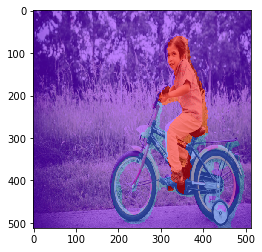

In [20]:
plt.imshow(((x+1)*127.5).astype(np.uint8))
plt.imshow(labels*20,alpha=.5,cmap=plt.cm.rainbow)